# 개요 및 특징

- 개요
  - pyTorch.org
  - 페이스북 + 뉴욕대
  - 개발 환경에 대한 코멘트, 지원이 양호
  - 딥러닝 서버에서 NVIDA + CUDA + 엔진 => GPU 학습 점검이 가장 난이도가 있다

- 특징
  - Define By Run  

- 방향
  - CNN 기준일때, 합성곱을 직접 구현, 풀링을 직접 구현한다
  - 디버깅이 용이, 수행하면 즉시 확인이 가능. 이런 측면이 파이썬과 유사하므로 연구쪽에서 많이 사용

# 모듈가져오기

In [ ]:
import torch

# 1.9.0 / cuda 102 지원
torch.__version__

'1.9.0+cu102'

# 텐서, Tensor

- 자료구조 
  - python
    - 수치, 문자열, 블린, 리스트, 튜플, 딕셔너리, 집합
  - numpy
    - ndarray
  - pandas
    - Series, DataFrame
  - tensorflow, pyTorch
    - **Tensor**
      - base로 numpy를 가지고 있다

- 개요
  - 텐서는 행렬이다
  - 기초적으로 행렬 연산을 안다면, 차후 식을 직접 구현할때 도움이 많이 된다
  - 딥러닝의 연산 기본 단위는 텐서이다

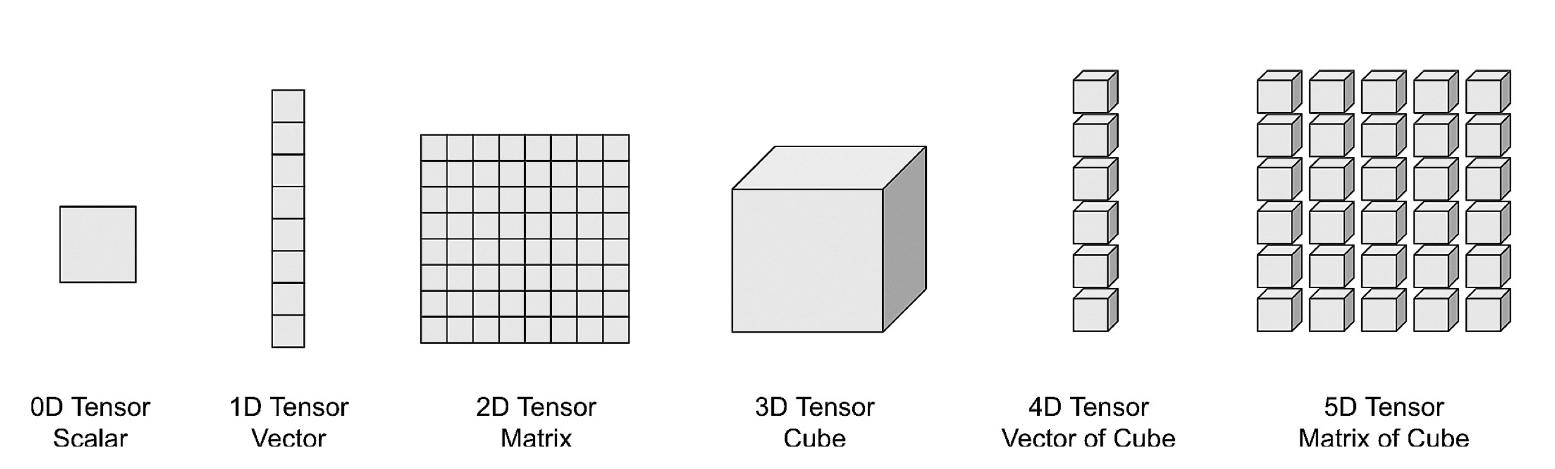

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/tensor_style.jpeg')

# n차원(D)-텐서

## 텐서 생성

- 리스트, 배열로부터 생성 가능

In [ ]:
# 리스트
list_src = [
  [10,11,12],
  [13,14,15]
]
list_src

[[10, 11, 12], [13, 14, 15]]

In [ ]:
# 텐서플로우에서는 데이터 주입 없이,  shape을 기준으로 텐서를 만들었다
x = torch.Tensor( list_src )
x
# 토치는 텐서 생성시 바로 데이터를 넣어서 직관적으로 확인이 가능하다

tensor([[10., 11., 12.],
        [13., 14., 15.]])

In [ ]:
# 원복
# 텐서에서 리스트로 변환, 획득
x.tolist()

[[10.0, 11.0, 12.0], [13.0, 14.0, 15.0]]

In [ ]:
# 배열로부터 생성
import numpy as np

In [ ]:
arr = np.array( list_src )
arr

array([[10, 11, 12],
       [13, 14, 15]])

In [ ]:
# 배열로 부터 텐서를 만든다
x = torch.Tensor( arr )
x

tensor([[10., 11., 12.],
        [13., 14., 15.]])

In [ ]:
# 텐서로부터 배열을 추출한다
x.numpy()

array([[10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

In [ ]:
# 난수
# low <= x < high
torch.randint( 0, 5, size=(2,3))

tensor([[0, 3, 1],
        [3, 0, 0]])

In [ ]:
# 영행렬
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# 구성원이 모두 1인 행렬
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
torch.zeros_like( x )

tensor([[0., 0., 0.],
        [0., 0., 0.]])

# GPU 사용

- 텐서별로 GPU 사용 여부를 등록할수 있다
- 전체적으로 적용하는것도 가능
- 단위별로 적용하는것도 가능

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# 토치가 gpu 를 지원하는지에 따라 텐서에 처리
DEVICE = torch.device( "cuda" if torch.cuda.is_available() else "cpu"  )
DEVICE

device(type='cpu')

In [ ]:
# 특정 텐서가 어떤 방식으로 학습할지 지정
x.to( DEVICE )
# 향후 이 텐서가 연산을 수행할때, 해당 디바이스를 이용하여 처리된다

tensor([[10., 11., 12.],
        [13., 14., 15.]])

In [ ]:
# 장비가 여러개라면 
torch.cuda.device_count()

0

# 텐서의 타입

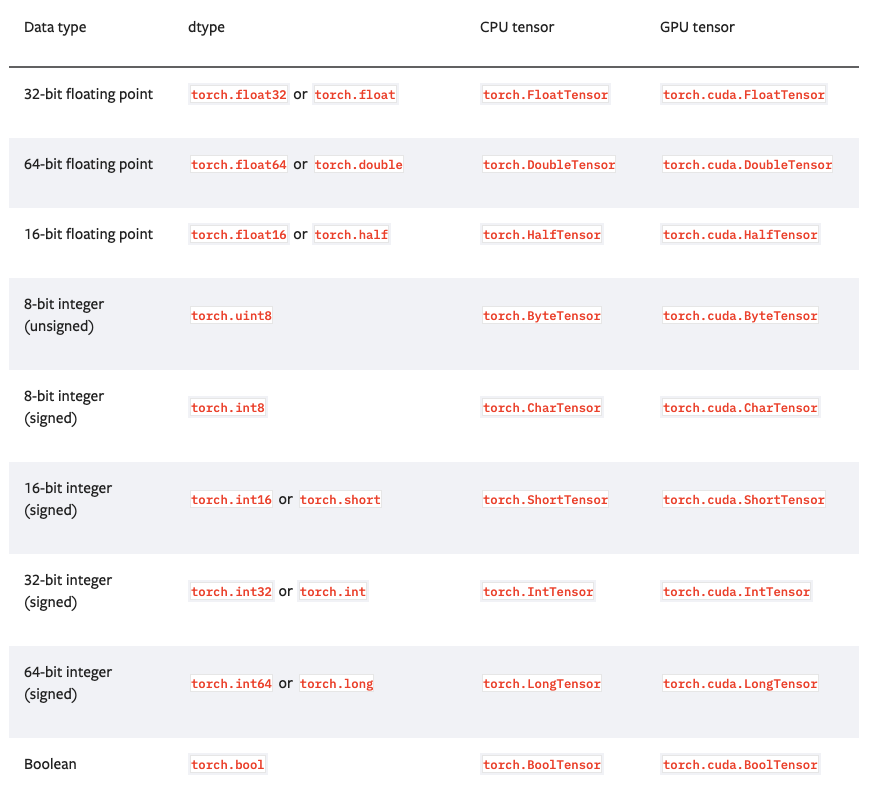

In [ ]:
Image( '/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/torch2.png' )
# 블린, 정수, 양의정수, 부동소수 지원
# 딥러닝의 학습시 데이터는 무조건 수치여야 한다

In [ ]:
a = torch.FloatTensor( np.array( [1,2,3,4] ) )

# 기존의 파이썬 코드를 이용하여 타입이나 형태등등 확인할수 있다 
# 기본적으로 torch 만의 표현읋 이용하여 정보를 알아내는게 더 정확하다
# 대부분은 토치의 기능은 함수로 지원해 준다
a, type(a), a.type(), a.shape, a.size(), a.dtype

(tensor([1., 2., 3., 4.]),
 torch.Tensor,
 'torch.FloatTensor',
 torch.Size([4]),
 torch.Size([4]),
 torch.float32)

In [ ]:
a = torch.LongTensor( np.array( [1,2,3,4] ) )
a, type(a), a.type(), a.shape, a.size(), a.dtype

(tensor([1, 2, 3, 4]),
 torch.Tensor,
 'torch.LongTensor',
 torch.Size([4]),
 torch.Size([4]),
 torch.int64)

In [ ]:
a = torch.BoolTensor( np.array( [True, False] ) )
a, type(a), a.type(), a.shape, a.size(), a.dtype

(tensor([ True, False]),
 torch.Tensor,
 'torch.BoolTensor',
 torch.Size([2]),
 torch.Size([2]),
 torch.bool)

# 텐서의 조작 및 연산

- 텐서를 만나면, 바로 체크 해야할 요소
  - 모양 : size(), shape
  - 차원 : dim(),  ndim
  - 타입 : type(), dtype

In [ ]:
# 토치의 난수 고정
# 난수의 시드가 고정되어서 항상 같은 결과를 얻을수 있다
torch.manual_seed( 1024 )

In [ ]:
# 난수로 행렬을 생성
x = torch.randint( 0, 10, size = (2,3,4) )
x

tensor([[[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]],

        [[8, 7, 4, 9],
         [3, 1, 3, 9],
         [2, 3, 3, 9]]])

In [ ]:
# 모양, 차원, 타입
x.size(), x.dim(), x.type()

(torch.Size([2, 3, 4]), 3, 'torch.LongTensor')

## indexing, slicing

- 텐서내에서 특정 데이터를 추출
  - 인덱싱 : 차원축소
  - 슬라이싱 : 차원 유지

In [ ]:
x

tensor([[[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]],

        [[8, 7, 4, 9],
         [3, 1, 3, 9],
         [2, 3, 3, 9]]])

In [ ]:
# 인덱싱 -> 기존에 사용하던 방식과 동일
x[ 0 ]

tensor([[7, 1, 1, 4],
        [5, 1, 1, 8],
        [9, 6, 5, 4]])

In [ ]:
x[ -1 ]

tensor([[8, 7, 4, 9],
        [3, 1, 3, 9],
        [2, 3, 3, 9]])

In [ ]:
# 인덱싱 응용
# 차원을 줄여가면서 데이터를 추출하고 싶다면 -> 나열하라
x[0][0], x[0][0][0], x[ 0, 0 ], x[ 0, 0, 0 ]

(tensor([7, 1, 1, 4]), tensor(7), tensor([7, 1, 1, 4]), tensor(7))

In [ ]:
# 텐서의 시각화
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# src: (2,3,4)
# 텐서를 그리는 함수 (제한적)
def drawTensor( src ):
  # 1. 기본형태 횏득
  fig, axes = plt.subplots( len(src), 1 )
  # 2. 플리팅
  for i in range( len(src) ):
    # 텐서를 배열로 전환 
    axes[i].matshow( src[i].numpy(), vmin=0, vmax=1, cmap='gray' )
  # 3. 표를 그린다
  plt.show()
  pass

In [ ]:
tmp = torch.ones_like(x)
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [ ]:
tmp2 = torch.zeros_like(x)
tmp2

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

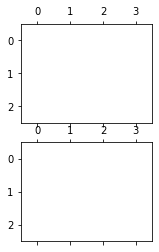

In [ ]:
# 1 -> 흰색
drawTensor( tmp )

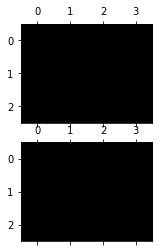

In [ ]:
# 0 -> 검은색
drawTensor( tmp2 )

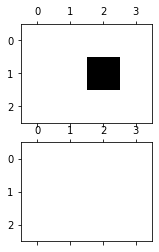

In [ ]:
# 텐서의 특정 위치가 어떻게 변경되었는지 확인할수 있다 ( 시각적 )
tmp[ 0, 1, 2 ] = 0
drawTensor( tmp )

In [ ]:
# 슬라이싱
# 변수[ 시작인덱스:끝인덱스:step(일반적으로생략) ]
tmp[:]

tensor([[[1, 1, 1, 1],
         [1, 1, 0, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [ ]:
x

tensor([[[7, 1, 1, 4],
         [5, 1, 1, 8],
         [9, 6, 5, 4]],

        [[8, 7, 4, 9],
         [3, 1, 3, 9],
         [2, 3, 3, 9]]])

In [ ]:
# 인덱싱과 슬라이싱을 결합하셔 추출도 가능 => 커널이 이미지상의 공간을 이동하면서 행렬의곱 => 이미지 공간
# 상의 특정 정보를 추출할수 있어야 한다
x[ 1, :2, 1:3 ]

tensor([[7, 4],
        [1, 3]])

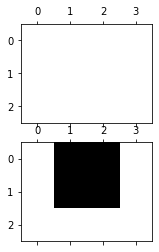

In [ ]:
x[ 1, :2, 1:3 ] = 0
drawTensor( x )

## view

- numpy의 reshape와 동일한 기능
- 차원을 변경한다, shape을 변경한다
- **변경 전후 원소수는 동일**해야 한다
- **원소들의 순서도 동일**

In [ ]:
x, x.shape, x.size()

(tensor([[[7, 1, 1, 4],
          [5, 1, 1, 8],
          [9, 6, 5, 4]],
 
         [[8, 0, 0, 9],
          [3, 0, 0, 9],
          [2, 3, 3, 9]]]), torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

In [ ]:
x.reshape( 2,2,6 )

tensor([[[7, 1, 1, 4, 5, 1],
         [1, 8, 9, 6, 5, 4]],

        [[8, 0, 0, 9, 3, 0],
         [0, 9, 2, 3, 3, 9]]])

In [ ]:
# 텐서에서는 가급적 텐서의 함수를 이용하여서 구현 
x.view( 2,2,6 )

tensor([[[7, 1, 1, 4, 5, 1],
         [1, 8, 9, 6, 5, 4]],

        [[8, 0, 0, 9, 3, 0],
         [0, 9, 2, 3, 3, 9]]])

In [ ]:
# 데이터의 개수를 모른다면
x.view( -1, 12 )

tensor([[7, 1, 1, 4, 5, 1, 1, 8, 9, 6, 5, 4],
        [8, 0, 0, 9, 3, 0, 0, 9, 2, 3, 3, 9]])

## transpose

- 차원간 맞교환
- 넓은 의미로 보면 view를 어떻게 응요하면 되지 않나?
  - view는 원소의 순서를 유지, 모양이 변경
  - transpose는 **차원끼리 맞바꾸기**때문에 원소의 순서가 무너진다 -> 모양이 변경된다
- (2,3,4) -> (3,2,4) or (4,3,2) **맞교환** 가능

In [ ]:
x, x.size()

(tensor([[[7, 1, 1, 4],
          [5, 1, 1, 8],
          [9, 6, 5, 4]],
 
         [[8, 0, 0, 9],
          [3, 0, 0, 9],
          [2, 3, 3, 9]]]), torch.Size([2, 3, 4]))

In [ ]:
x.transpose( 0, 1 ), x.transpose( 0, 1 ).size()

(tensor([[[7, 1, 1, 4],
          [8, 0, 0, 9]],
 
         [[5, 1, 1, 8],
          [3, 0, 0, 9]],
 
         [[9, 6, 5, 4],
          [2, 3, 3, 9]]]), torch.Size([3, 2, 4]))

## squeeze, unsqueeze

- squeeze : 차원 값이 1인 차원을 제거
- unsqueeze : 차원 값이 1인 차원을 추가

In [ ]:
x = torch.rand( ( 3, 1, 2, 4, 1 ) )
x.size(), x

(torch.Size([3, 1, 2, 4, 1]), tensor([[[[[0.7811],
            [0.0282],
            [0.0970],
            [0.9834]],
 
           [[0.3089],
            [0.9617],
            [0.2606],
            [0.3893]]]],
 
 
 
         [[[[0.3813],
            [0.8005],
            [0.9846],
            [0.1103]],
 
           [[0.5169],
            [0.3025],
            [0.7295],
            [0.2983]]]],
 
 
 
         [[[[0.9722],
            [0.6141],
            [0.4937],
            [0.0130]],
 
           [[0.6209],
            [0.0591],
            [0.5611],
            [0.5226]]]]]))

In [ ]:
# 원소의 순서가 유지되고 있다 -> view도 가능하다
tmp = x.squeeze()
tmp.size(), tmp

(torch.Size([3, 2, 4]), tensor([[[0.7811, 0.0282, 0.0970, 0.9834],
          [0.3089, 0.9617, 0.2606, 0.3893]],
 
         [[0.3813, 0.8005, 0.9846, 0.1103],
          [0.5169, 0.3025, 0.7295, 0.2983]],
 
         [[0.9722, 0.6141, 0.4937, 0.0130],
          [0.6209, 0.0591, 0.5611, 0.5226]]]))

In [ ]:
# 특정 차원에 차원값이 1인 차원을 추가
x.squeeze().unsqueeze(2).size()

torch.Size([3, 2, 1, 4])

## cat, stack

- 텐서를 합친다
- cat
  - 단순 합치기
- stack
  - 쌓는다

In [ ]:
x.dim(), x.size(), x.ndimension()

(5, torch.Size([3, 1, 2, 4, 1]), 5)

In [ ]:
a = torch.rand( (2,3) )
a

tensor([[0.2338, 0.4780, 0.7890],
        [0.3664, 0.7937, 0.9290]])

In [ ]:
b = torch.rand( (2,3) )
b

tensor([[0.8352, 0.6012, 0.4603],
        [0.6794, 0.9339, 0.2197]])

In [ ]:
# 단순 합치기
# dim=0 => (4,3)
tmp = torch.cat( [ a, b], dim=0 )
tmp, tmp.size()

(tensor([[0.2338, 0.4780, 0.7890],
         [0.3664, 0.7937, 0.9290],
         [0.8352, 0.6012, 0.4603],
         [0.6794, 0.9339, 0.2197]]), torch.Size([4, 3]))

In [ ]:
# 순번대로는 아니고, 같은 위치에 잇는 원소끼리 이어 붙인다
# dim = 1 => (2, 6)
tmp = torch.cat( [ a, b], dim=1 )
tmp, tmp.size()

(tensor([[0.2338, 0.4780, 0.7890, 0.8352, 0.6012, 0.4603],
         [0.3664, 0.7937, 0.9290, 0.6794, 0.9339, 0.2197]]),
 torch.Size([2, 6]))

In [ ]:
# 쌓는다
tmp = torch.stack( [a, a, b], dim=0 )
tmp, tmp.size()

(tensor([[[0.2338, 0.4780, 0.7890],
          [0.3664, 0.7937, 0.9290]],
 
         [[0.2338, 0.4780, 0.7890],
          [0.3664, 0.7937, 0.9290]],
 
         [[0.8352, 0.6012, 0.4603],
          [0.6794, 0.9339, 0.2197]]]), torch.Size([3, 2, 3]))

In [ ]:
a, b

(tensor([[0.2338, 0.4780, 0.7890],
         [0.3664, 0.7937, 0.9290]]), tensor([[0.8352, 0.6012, 0.4603],
         [0.6794, 0.9339, 0.2197]]))

In [ ]:
# 같은 자리끼리 묶여서 하나의 텐서로 완성
tmp = torch.stack( [a, b], dim=1 )
tmp, tmp.size()

(tensor([[[0.2338, 0.4780, 0.7890],
          [0.8352, 0.6012, 0.4603]],
 
         [[0.3664, 0.7937, 0.9290],
          [0.6794, 0.9339, 0.2197]]]), torch.Size([2, 2, 3]))

## 일반 기초 연산

- +, -, *, /
- 브로드케스팅 개념(numpy에서도 언급)

In [ ]:
# (2, 3), (2, 3)
x = torch.Tensor( [ [1,2,3],   [4,5,6]    ]  )
y = torch.Tensor( [ [10,20,30],[40,50,60] ] )
x, y

(tensor([[1., 2., 3.],
         [4., 5., 6.]]), tensor([[10., 20., 30.],
         [40., 50., 60.]]))

In [ ]:
# 행렬의 합
# 11 = 1 + 10 =>  2개의 행렬에서 같은 자리에 있는 데이터끼리 합산했다
x + y, (x + y).size()

(tensor([[11., 22., 33.],
         [44., 55., 66.]]), torch.Size([2, 3]))

In [ ]:
z = torch.Tensor( [10] )
z

tensor([10.])

In [ ]:
# 10은 스칼라가 아닌데, size()가 다른데 어떻게 행렬의 합이 완성되었지?
# 1+10, 2+10, 3+10
# 4+10, 5+10, 6+10
# 브로드 케스팅 개념이 적용
# 연산의 대상이 되는 행렬간의 모양이 달라도 strectch(늘려서 모양을 조정)를 통해서 연산이 가능하다면 
# 가능하게끔 조정 연산 처리 해준다 => xW + b <- 여기서 실제로 적용된다

x + z 

tensor([[11., 12., 13.],
        [14., 15., 16.]])

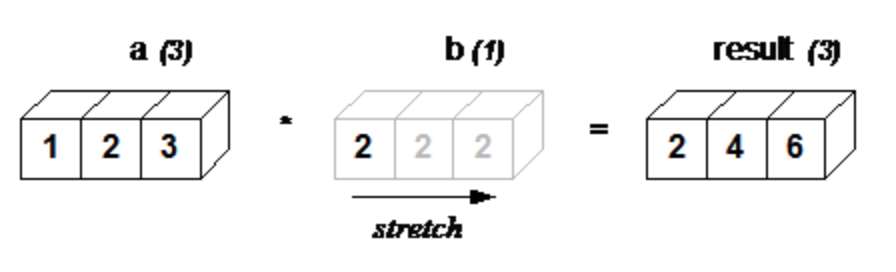

In [ ]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/broadcasting_1.png')

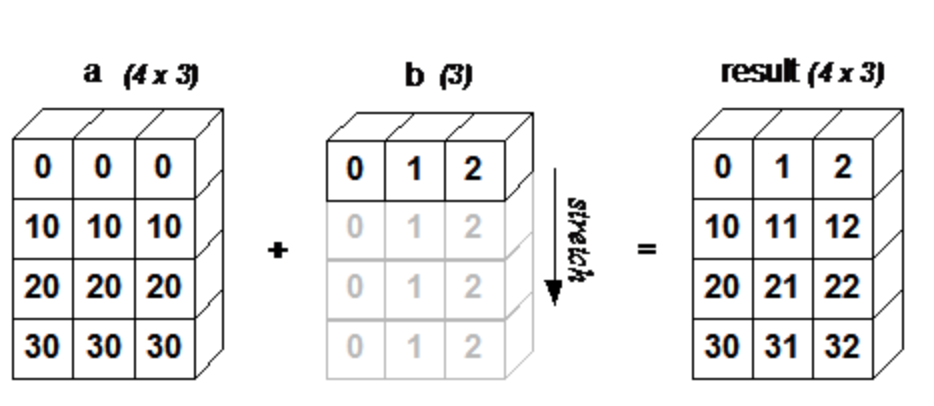

In [ ]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/broadcasting_2.png')

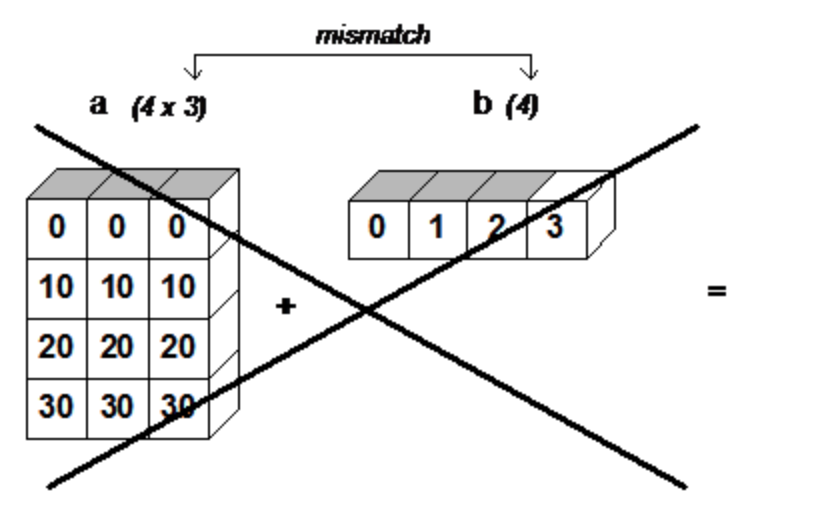

In [ ]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/broadcasting_3.png')

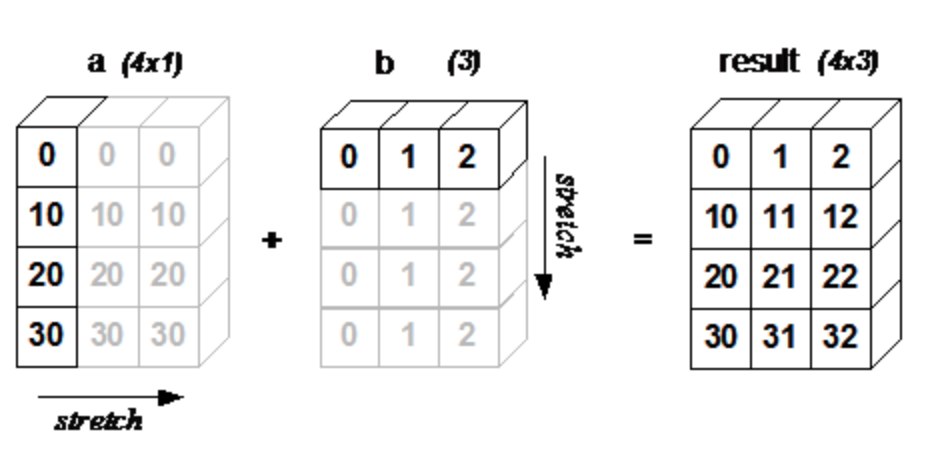

In [ ]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/broadcasting_4.png')

In [ ]:
x + y, torch.add(x, y)

(tensor([[11., 22., 33.],
         [44., 55., 66.]]), tensor([[11., 22., 33.],
         [44., 55., 66.]]))

In [ ]:
x - y, torch.sub(x, y)

(tensor([[ -9., -18., -27.],
         [-36., -45., -54.]]), tensor([[ -9., -18., -27.],
         [-36., -45., -54.]]))

In [ ]:
x * y, torch.mul( x, y)

(tensor([[ 10.,  40.,  90.],
         [160., 250., 360.]]), tensor([[ 10.,  40.,  90.],
         [160., 250., 360.]]))

In [ ]:
x / y, torch.div(x,y)

(tensor([[0.1000, 0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000]]), tensor([[0.1000, 0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000]]))

# 텐서의 기타 함수

In [ ]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# 텐서 + 스칼라 => 스칼라 값이 모든 원소에 가서 연산 수행
x + 1

tensor([[2., 3., 4.],
        [5., 6., 7.]])

In [ ]:
x = torch.Tensor( [1,2,3]  )
y = torch.Tensor( [4,5,6] )
x, y

(tensor([1., 2., 3.]), tensor([4., 5., 6.]))

In [ ]:
# 내적, 원소가 같은 자리에 있는 요소끼리 곱했다면
# 32 = 1*4 + 2*5 + 3*6 = 4 + 10 + 18 = 14 + 18 = 32
torch.dot( x, y )

tensor(32.)

In [ ]:
x = torch.Tensor( [
  [1,3],
  [2,3],
  [5,6]
])
x.size()

torch.Size([3, 2])

In [ ]:
y = torch.Tensor( [
  [7,8],
  [9,10]
])
y.size()

torch.Size([2, 2])

In [ ]:
print( x )
print( y )

tensor([[1., 3.],
        [2., 3.],
        [5., 6.]])
tensor([[ 7.,  8.],
        [ 9., 10.]])


In [ ]:
# xW, 행렬의 곱을 사용한다
# (3,2)mm(2,2) => (3,2)
# matrix multiple
# 34 = 
tmp = torch.mm( x, y )
tmp, tmp.size()

(tensor([[ 34.,  38.],
         [ 41.,  46.],
         [ 89., 100.]]), torch.Size([3, 2]))

In [ ]:
# 에러, shape에 문제
# x * y

In [ ]:
x = torch.Tensor( [ 1,2,3,4,5,6,7,8 ] )
x

tensor([1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
x.size()

torch.Size([8])

In [ ]:
# 형태 변경, 원소 순서 유지
x = x.view(2,2,2)
x, x.size()

(tensor([[[1., 2.],
          [3., 4.]],
 
         [[5., 6.],
          [7., 8.]]]), torch.Size([2, 2, 2]))